**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

**Reading the dataset**

In [2]:
df = pd.read_csv('/kaggle/input/spotify-artist-track-data/spotify_data.csv')

In [3]:
df.head()

,artist_name,track_name,track_id,popularity
0,Juice WRLD,All Girls Are The Same,4VXIryQMWpIdGgYR4TrjT1,83
1,Schoolgirl Byebye,"Year,2015",0UsmyJDsst2xhX1ZiFF3JW,25
2,Juice WRLD,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,84
3,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster,4fbwTO3DJ2qryMddov9RbB,49
4,Joji,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,83


**Getting to know the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  4000 non-null   object
 1   track_name   4000 non-null   object
 2   track_id     4000 non-null   object
 3   popularity   4000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,4000.0,51.1095,31.08038,0.0,27.0,63.0,80.0,94.0


Text(0.5, 1.0, 'Most Popular 15 Artists')

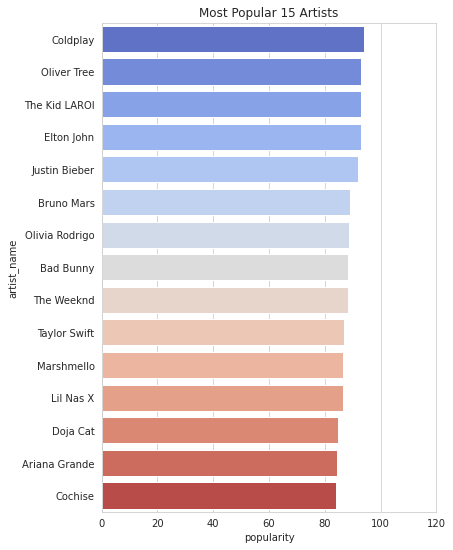

In [6]:
sns.set_style('whitegrid')

plt.figure(figsize=(6,9))

top15_artist = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(15).reset_index()

sns.barplot(x=top15_artist['popularity'], y=top15_artist['artist_name'], palette='coolwarm')

plt.xlim(0,120)

plt.title('Most Popular 15 Artists')

Text(0.5, 1.0, 'Most popular 15 tracks')

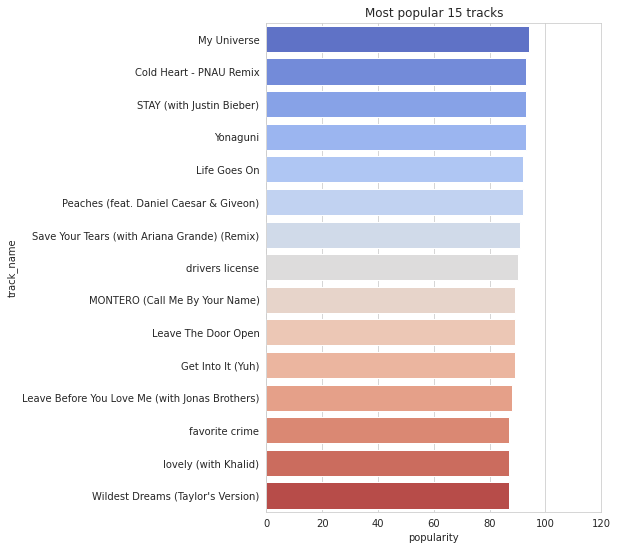

In [7]:
plt.figure(figsize=(6,9))

top15_track = df.groupby('track_name')['popularity'].mean().sort_values(ascending=False).head(15).reset_index()


sns.barplot(x=top15_track['popularity'], y=top15_track['track_name'], palette='coolwarm')

plt.xlim(0,120)

plt.title('Most popular 15 tracks')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

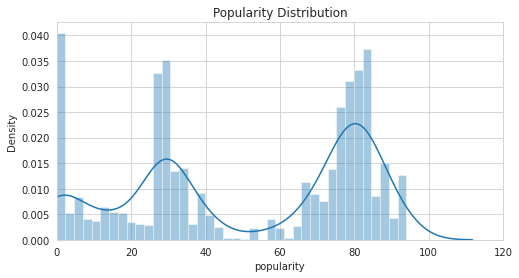

In [8]:
plt.figure(figsize=(8,4))
sns.distplot(df['popularity'],kde=True,bins=40)

plt.xlim(0,120)

plt.title('Popularity Distribution')

**Number of Artist/Track Ratings**

In [9]:
music_df = pd.DataFrame(df.groupby('artist_name')['popularity'].mean())

In [10]:
music_df['num_of_ratings'] = df.groupby('artist_name')['popularity'].count()
music_df = music_df.reset_index()
music_df.head()

,artist_name,popularity,num_of_ratings
0,$uicideboy$,68.000000,2
1,015B,21.166667,12
2,03 Greedo,68.000000,1
3,21 Savage,77.434783,23
4,5 Seconds of Summer,79.000000,2


**Correlation Matrix**

In [11]:
music_df.corr()

,popularity,num_of_ratings
popularity,1.000000,0.075784
num_of_ratings,0.075784,1.000000


**Most Rated Popular Artists**

In [12]:
popular_artstists_df = pd.DataFrame(music_df.sort_values('popularity', ascending=False)[:14])

In [13]:
popular_artstists_df = popular_artstists_df.sort_values('num_of_ratings', ascending=False)

(0.0, 50.0)

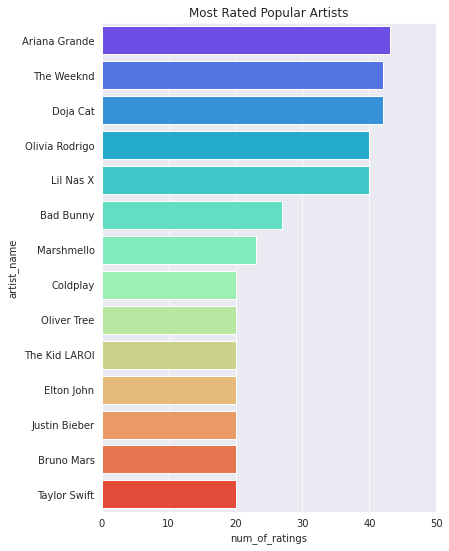

In [14]:
plt.figure(figsize=(6,9))

sns.set_style('darkgrid')
sns.barplot(x='num_of_ratings', y='artist_name', data=popular_artstists_df,  palette='rainbow')

plt.title('Most Rated Popular Artists')
plt.xlim(0,50)
